In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt, fabs

In [2]:
df = pd.read_csv("laba1_2.csv", sep=';')

In [3]:
df

,theta,number_channel
0,0,864
1,10,832
2,20,793
3,30,725
4,40,662
5,50,594
6,60,520
7,70,463
8,80,416
9,90,372


In [150]:
theta = np.array(df['theta'])
number_channel = np.array(df['number_channel'])

In [151]:
# переводим в радианы
theta = np.pi / 180 * theta

In [152]:
theta

array([0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
       0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633,
       1.74532925, 1.91986218, 2.0943951 ])

In [153]:
ox = 1 - np.cos(theta)

In [154]:
oy = 1 / number_channel

In [155]:
ox 

array([0.        , 0.01519225, 0.06030738, 0.1339746 , 0.23395556,
       0.35721239, 0.5       , 0.65797986, 0.82635182, 1.        ,
       1.17364818, 1.34202014, 1.5       ])

In [156]:
oy

array([0.00115741, 0.00120192, 0.00126103, 0.00137931, 0.00151057,
       0.0016835 , 0.00192308, 0.00215983, 0.00240385, 0.00268817,
       0.00286533, 0.00322581, 0.0035461 ])

In [159]:
# погрешности для 1/N(\Theta) и (1 - cos(\theta))
sigma_N = 10
sigma_theta = 0.0174533
errorbar_y = [sigma_N/i**2 for i in number_channel] 
errorbar_x = [np.sin(i) * sigma_theta for i in theta]


In [160]:
errorbar_x

[0.0,
 0.0030307337392742354,
 0.005969380167505894,
 0.008726649999999999,
 0.011218764988142076,
 0.01337000347908846,
 0.015115001179870944,
 0.016400737218362695,
 0.017188145155647972,
 0.0174533,
 0.017188145155647972,
 0.016400737218362698,
 0.015115001179870947]

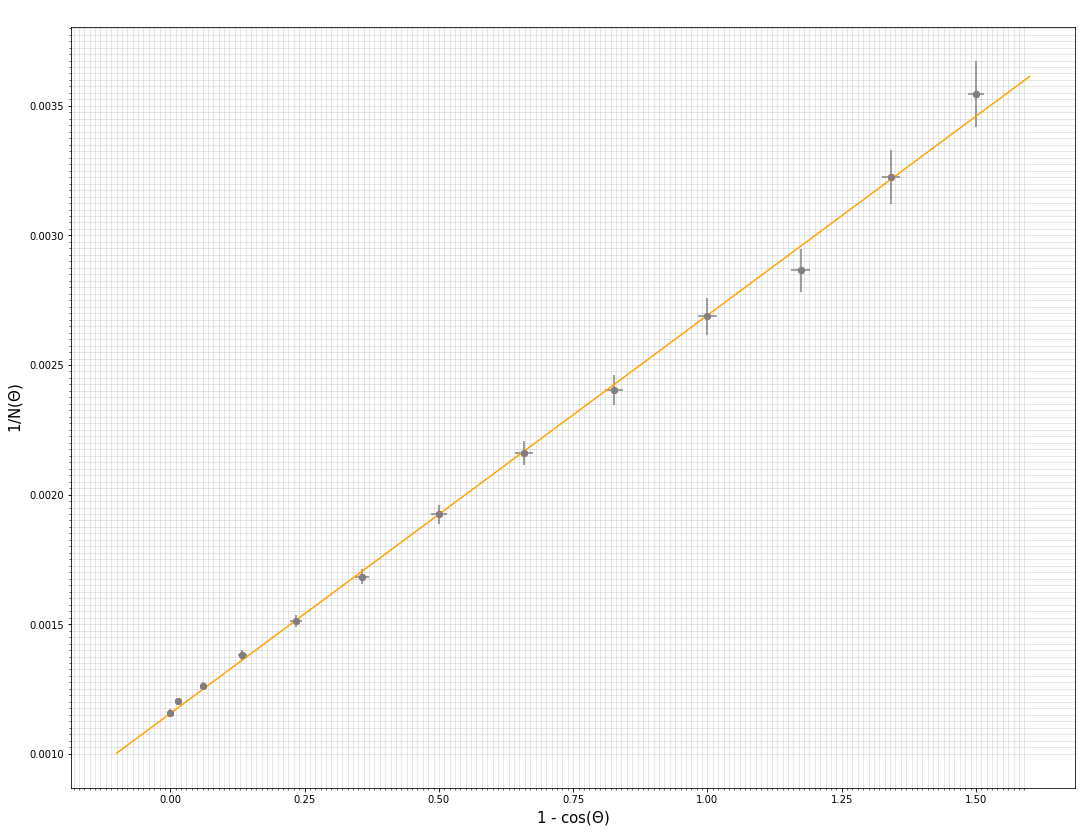

In [161]:
fig = plt.figure(figsize=(18, 14)); 
ax = fig.gca()
ax.set_xticks(np.arange(-0.2, 1.6, 0.01), minor=True) # это для мелких делений по оси ОХ
ax.set_yticks(np.arange(0.001, 0.004, 0.000025), minor=True) # аналогично для OY
ax.grid(which='minor', alpha=0.4, linestyle='-')

plt.title(' ', fontsize=18); 
# plt.grid(ls='-')

# plt.plot(ox, oy, lw=2, label='Длина волны', color='black')
mnk_coef = np.polyfit(ox, oy, 1) # считаем коэфф-ты аппроксимирующей прямой
xp = np.linspace(-0.1, 1.6, 100)
p = np.poly1d(mnk_coef) # создаем полином с коэффициентами (убывающими по степени) из массива mnk_coef_f1
# test1 = np.poly1d([mnk_coef[0] + sigma_k, mnk_coef[1] + sigma_c]) 
# test2 = np.poly1d([mnk_coef[0] - sigma_k, mnk_coef[1] - sigma_c]) 


_ = plt.plot(xp, p(xp), color='orange', ) # рисуем точки и аппроксимирующую прямую


plt.xlabel('1 - cos($\Theta$)', fontsize=15); 
plt.ylabel('1/N($\Theta$)', fontsize=15)
plt.scatter(ox, oy, color='red')

plt.errorbar(ox, oy, yerr=errorbar_y, xerr=errorbar_x,fmt='o', color='grey')
plt.show()

In [162]:
# Ниже реализованы функции, которые считают погрешности для коэффициентов k и с, 
# найденных с помощью метода наименьших квадратов (y = kx + c)
# rmse означает root mean square error
def get_rmse_k(x, y, k, n):
    return  sqrt(fabs(((np.mean(y ** 2) - ((np.mean(y)) ** 2)) /
                 ((np.mean(x ** 2) - 
                   ((np.mean(x)) ** 2)))) - (k ** 2))) / sqrt(n)

def get_rmse_c(x, y, sigma_k, n):
    return sigma_k * sqrt(np.mean(x ** 2) - ((np.mean(x)) ** 2))

In [163]:
mnk_coef

array([0.00153645, 0.00115543])

In [164]:
sigma_k = get_rmse_k(ox, oy, mnk_coef[0], 13)
sigma_c = get_rmse_c(ox, oy, sigma_k, 13)

In [165]:
sigma_k, sigma_c

(2.052604251648306e-05, 1.0369277946083052e-05)

In [166]:
print(np.poly1d(p))

 
0.001536 x + 0.001155


In [103]:
E_gamma = 662 * 10**3 # эВ, значение из лабника

In [169]:
# cos(\theta) = 1, т.е. \theta = 0
theta_0 = p(0)
sigma_theta_0 = errorbar_y[9]
theta_0

0.001155432920689506

In [170]:
# cos(\theta) = 0, т.е. \theta = pi/2
theta_90 = p(1)
sigma_theta_90 = errorbar_y[0]
theta_90

0.002691880810258882

In [171]:
N_0 = 1 / theta_0
N_0

865.4764652224455

In [172]:
N_90 = 1 / theta_90
N_90

371.4874730667695

In [173]:
ans = E_gamma * N_90 / (N_0 - N_90)

In [174]:
# значение в лабе, которое мы ищем (энергию покоя электрона), настоящее значение равно примерно 511 кэВ,
# так что мы близки к истине
ans # эВ

497834.3871531059

In [175]:
sigma_N_0 = 1/theta_0**2 * sigma_theta_0
sigma_N_0

54.12833216657554

In [176]:
sigma_N_90 = 1/theta_90**2 * sigma_theta_90
sigma_N_90

1.8486762507171344

In [177]:
sigma_ans =  (sigma_N_0 * ( E_gamma * N_0 / (N_0 - N_90)**2) + sigma_N_90 * (E_gamma / (N_0 - N_90)))

In [179]:
# какая-то очень большая погрешность
sigma_ans

129565.08274549659

In [38]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
theta = np.arange(0, 121, 10)
N = np.array([839, 838, 830, 712, 668, 552, 475, 408, 372, 316, 303, 268, 267])

In [49]:
x = 1 - np.cos(theta * np.pi / 180)
y = 1 / N
p = np.poly1d(np.polyfit(x, y, 1))
grid = np.arange(0, 1.51, 0.05)

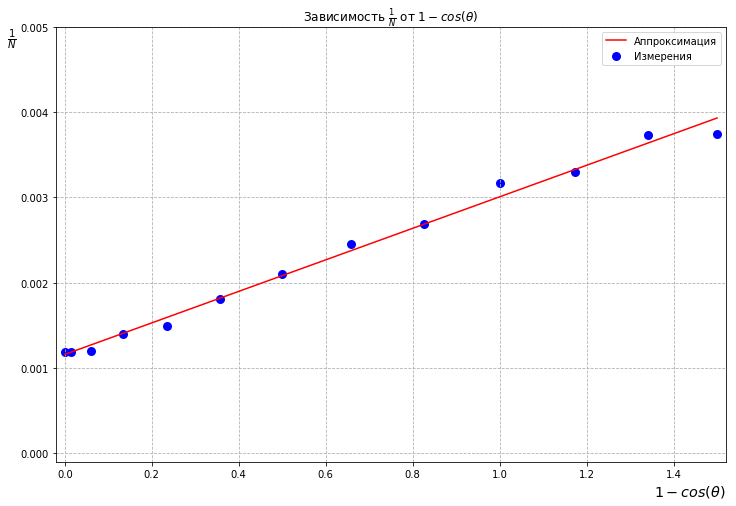

In [78]:
plt.figure(figsize=(12,8))
tmp = plt.axis()
plt.axis((-0.02, 1.52, -0.0001, 0.005))

plt.scatter(x, y, c='b', label='Измерения', linewidths=3)
plt.plot(grid, p(grid), c='r', label='Аппроксимация')

plt.xlabel(r'$1 - cos(\theta)$', horizontalalignment='right',
           fontsize='x-large', x=1)
h = plt.ylabel(r'$\frac{1}{N}$', verticalalignment='top',
               fontsize='x-large', horizontalalignment='right', y=1)
h.set_rotation(0)

plt.title(r'Зависимость $\frac{1}{N}$ от $1 - cos(\theta)$')
plt.legend(loc='best')
plt.grid(ls='--')
plt.savefig("First")
plt.show()

In [94]:
def GetK(x, y, k, n):
    return np.sqrt(((np.mean(y ** 2) - (np.mean(y) ** 2)) /
                    (np.mean(x ** 2) - (np.mean(x) ** 2))) - (k ** 2)) / sqrt(n)

def GetC(x, sigma_k, n):
    return sigma_k * sqrt(np.mean(x ** 2) - ((np.mean(x)) ** 2))

In [95]:
errk = GetK(x, y, p[0], 13)
errk

0.00040177256630008484

In [96]:
errc = GetC(x, errk, 13)
errc

0.00020296612986800343

In [97]:
errk / p[0]

0.34653706288279124

In [98]:
errc / p[1]

0.10981950803118178

In [99]:
p[0]

0.0011593927730494324

In [100]:
p[1]

0.0018481791942682345

In [106]:
xxx = (1 / p(1)) / ((1 / p(0)) - (1 / p(1))) * E_gamma

In [105]:
E_gamma * (316 / (839 - 316))

399984.70363288716

In [107]:
xxx * 0.4

166113.33319605177

In [108]:
xxx

415283.33299012936